In [1]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1: Three-way linear classification 

To be determined:

$
f_i(z) = a_i^T z -b_i \;\;\;\;\;\; \mathrm{for}\,\, i=1, 2, 3
$

with properties:

$
\begin{align}
f_1(x^{(j)}) &> \mathrm{max}\{ f_2(x^{(j)}), f_3(x^{(j)})   \}, \;\;\;j=1,..., N \\
f_2(y^{(j)}) &> \mathrm{max}\{ f_1(y^{(j)}), f_3(y^{(j)})   \}, \;\;\;j=1,..., M \\
f_3(z^{(j)}) &> \mathrm{max}\{ f_1(z^{(j)}), f_2(z^{(j)})   \}, \;\;\;j=1,..., P
\end{align}
$

Interpretation: The functions $f_1$, $f_2$, and $f_3$ partition $\mathbf{R}^n$ into three regions,

$
\begin{align}
R_1 = \{z | f_1(z) > \mathrm{max}\{f_2(z), f_3(z)\}   \} \\
R_2 = \{z | f_2(z) > \mathrm{max}\{f_1(z), f_3(z)\}   \} \\
R_3 = \{z | f_3(z) > \mathrm{max}\{f_1(z), f_2(z)\}   \} \\
\end{align}
$

Goal: Find functions with 

$
x^{(j)} \in R_1 \\
y^{(j)} \in R_2 \\
z^{(j)} \in R_3
$

via a convex optimization problem (without strict inequalities).

Convex problem statement:

$
\begin{align}
\mathbf{find}\; & a_1, a_2, a_3, b_1, b_2, b_3 \newline
\mathbf{subject \; to}\; & f_1(x^{(j)}) - \mathrm{max}\{ f_2(x^{(j)}), f_3(x^{(j)}) \ge 1, \;\;\;j=1,..., N  \newline
& f_2(y^{(j)}) - \mathrm{max}\{ f_1(y^{(j)}), f_3(y^{(j)})   \} \ge 1, \;\;\;j=1,..., M \\
& f_3(z^{(j)}) - \mathrm{max}\{ f_1(z^{(j)}), f_2(z^{(j)})   \} \ge 1 , \;\;\;j=1,..., P
\end{align}
$

In [2]:
# data for problem instance
M = 20
N = 20
P = 20

In [3]:
X = np.array(
    [
        [
            3.5674,
            4.1253,
            2.8535,
            5.1892,
            4.3273,
            3.8133,
            3.4117,
            3.8636,
            5.0668,
            3.9044,
            4.2944,
            4.7143,
            3.3082,
            5.2540,
            2.5590,
            3.6001,
            4.8156,
            5.2902,
            5.1908,
            3.9802,
        ],
        [
            -2.9981,
            0.5178,
            2.1436,
            -0.0677,
            0.3144,
            1.3064,
            3.9297,
            0.2051,
            0.1067,
            -1.4982,
            -2.4051,
            2.9224,
            1.5444,
            -2.8687,
            1.0281,
            1.2420,
            1.2814,
            1.2035,
            -2.1644,
            -0.2821,
        ],
    ]
)

In [4]:
Y = np.array(
    [
        [
            -4.5665,
            -3.6904,
            -3.2881,
            -1.6491,
            -5.4731,
            -3.6170,
            -1.1876,
            -1.0539,
            -1.3915,
            -2.0312,
            -1.9999,
            -0.2480,
            -1.3149,
            -0.8305,
            -1.9355,
            -1.0898,
            -2.6040,
            -4.3602,
            -1.8105,
            0.3096,
        ],
        [
            2.4117,
            4.2642,
            2.8460,
            0.5250,
            1.9053,
            2.9831,
            4.7079,
            0.9702,
            0.3854,
            1.9228,
            1.4914,
            -0.9984,
            3.4330,
            2.9246,
            3.0833,
            1.5910,
            1.5266,
            1.6256,
            2.5037,
            1.4384,
        ],
    ]
)

In [5]:
Z = np.array(
    [
        [
            1.7451,
            2.6345,
            0.5937,
            -2.8217,
            3.0304,
            1.0917,
            -1.7793,
            1.2422,
            2.1873,
            -2.3008,
            -3.3258,
            2.7617,
            0.9166,
            0.0601,
            -2.6520,
            -3.3205,
            4.1229,
            -3.4085,
            -3.1594,
            -0.7311,
        ],
        [
            -3.2010,
            -4.9921,
            -3.7621,
            -4.7420,
            -4.1315,
            -3.9120,
            -4.5596,
            -4.9499,
            -3.4310,
            -4.2656,
            -6.2023,
            -4.5186,
            -3.7659,
            -5.0039,
            -4.3744,
            -5.0559,
            -3.9443,
            -4.0412,
            -5.3493,
            -3.0465,
        ],
    ]
)

### Define variables

In [6]:
a1 = cvx.Variable(2)
a2 = cvx.Variable(2)
a3 = cvx.Variable(2)
b1 = cvx.Variable(1)
b2 = cvx.Variable(1)
b3 = cvx.Variable(1)

### Define objective

In [7]:
# Since this is only a 'find' optimization problem, the objective is a dummy
objective = cvx.Minimize(0)

### Define constraints

In [8]:
constraints = [
    a1 @ X - b1 - cvx.maximum(a2 @ X - b2, a3 @ X - b3) >= 1,
    a2 @ Y - b2 - cvx.maximum(a1 @ Y - b1, a3 @ Y - b3) >= 1,
    a3 @ Z - b3 - cvx.maximum(a1 @ Z - b1, a2 @ Z - b2) >= 1,
    a1 + a2 + a3 == 0,
    b1 + b2 + b3 == 0,
]

Note that the last two constraints are not strictly necessary. They are used to simplify the solution without loss of generality. This holds because we can add the same arbitrary vector to all $a_i$ without impacting the constraints. The same is true for the $b_i$.

### Form and solve the free problem

In [9]:
problem = cvx.Problem(objective, constraints)
problem.solve()  # Returns the optimal value.

0.0

### Plotting the three-way separation

In [10]:
def plot(a1, a2, a3, b1, b2, b3):

    # find maximally confusing point (f_1 = f_2 = f_3)
    # (not really needed)
    p = np.linalg.solve(
        np.array([(a1 - a2),(a1 - a3)]),
        np.array([(b1 - b2),(b1 - b3)])
    )
    
    # Create discrete values
    t = np.arange(-7, 7.01, 0.01)
    
    u1 = a1 - a2
    u2 = a2 - a3
    u3 = a3 - a1
    v1 = b1 - b2
    v2 = b2 - b3
    v3 = b3 - b1
    
    y_f2_ge_f1 = (-t*u1[0]+v1)/u1[1]
    flag_t_f2_ge_f1_and_f2_ge_f3 = (u2 @ np.stack([t, y_f2_ge_f1]) - v2) > 0

    y_f3_ge_f2 = (-t*u2[0]+v2)/u2[1]
    flag_t_f3_ge_f2_and_f3_ge_f1 = (u3 @ np.stack([t, y_f3_ge_f2]) - v3) > 0

    y_f1_ge_f3 = (-t*u3[0]+v3)/u3[1]
    flag_t_f1_ge_f3_and_f1_ge_f2 = (u1 @ np.stack([t, y_f1_ge_f3]) - v1) > 0
    
    plt.figure(figsize=(10, 10))
    plt.plot(t[flag_t_f2_ge_f1_and_f2_ge_f3], y_f2_ge_f1[flag_t_f2_ge_f1_and_f2_ge_f3], color='black')
    plt.plot(t[flag_t_f3_ge_f2_and_f3_ge_f1], y_f3_ge_f2[flag_t_f3_ge_f2_and_f3_ge_f1], color='black')
    plt.plot(t[flag_t_f1_ge_f3_and_f1_ge_f2], y_f1_ge_f3[flag_t_f1_ge_f3_and_f1_ge_f2], color='black')
    plt.scatter(X[0,:], X[1,:], color = 'blue')
    plt.scatter(Y[0,:], Y[1,:], color = 'red')
    plt.scatter(Z[0,:], Z[1,:], color = 'green')
    plt.axis((-7, 7, -7, 7))

    plt.show()

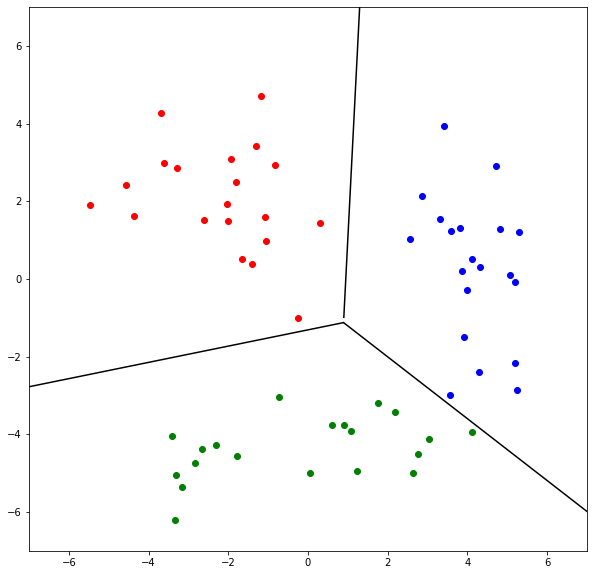

In [11]:
plot(a1.value, a2.value, a3.value, b1.value, b2.value, b3.value)

# Question 2: Fitting a sphere to data 


Goal: Fit a sphere $\left\{ x\,\, \mathrm{in} \,\, \mathbf{R}^n | \lVert x - x_c  \rVert_2 = r \right\}$ to $m$ points $u_i$ by minimizing the error function:

$
\sum_{i=1}^n \left( \lVert u_i - x_c   \rVert_2^2 -r^2   \right)^2
$

over variables $x_c \in \mathbf{R}^n$ (center of the sphere) and $r \in \mathbf{R}$ (radius of the sphere).

Unfortunately the objective in this form is not convex but can be reformulated as a simple least squares problem. For that start by expanding the inner part of the sum for a specific $i$:

$
\begin{align}
  & \left( \lVert u_i - x_c   \rVert_2^2 -r^2   \right)^2 \newline
= & \left( u_i^T u_i - 2 u_i^T x_c + x_c^T x_c - r^2    \right)^2 \\
= & \left( -2 u_i^T x_c - r^2 + \lVert u_i \rVert_2^2 + \lVert x_c \rVert_2^2   \right)^2 \newline
= & \left( 2 u_i^T x_c + r^2 - \lVert x_c \rVert_2^2 - \lVert u_i \rVert_2^2   \right)^2
\end{align}
$

Define new variables $x$, $t$ and parameters $A$, $b$:

$
\begin{align}
x &=& \begin{bmatrix}
x_c^T \newline
t
\end{bmatrix} \newline
t &=& r^2 - \lVert x_c \rVert_2^2 \newline
A &=& \begin{bmatrix}
2 U_1^T, 1 \newline
2 U_2^T, 1 \newline
\vdots \newline
2 U_m^T, 1
\end{bmatrix} \newline
b &=& \begin{bmatrix}
\lVert u_1 \rVert_2^2 \newline
\lVert u_2 \rVert_2^2 \newline
\vdots \newline
\lVert u_m \rVert_2^2
\end{bmatrix}
\end{align}
$

Then the objective can be expressed as:

$
\mathbf{minimize} \,\,\, \lVert A x - b \rVert_2
$


In [12]:
U = np.array([
  [-3.8355737e+00,   5.9061250e+00],
  [-3.2269177e+00,   7.5112709e+00],
  [-1.6572955e+00,   7.4704730e+00],
  [-2.8202585e+00,   7.7378120e+00],
  [-1.7831869e+00,   5.4818448e+00],
  [-2.1605783e+00,   7.7231450e+00],
  [-2.0960803e+00,   7.7072529e+00],
  [-1.3866295e+00,   6.1452654e+00],
  [-3.2077849e+00,   7.6023307e+00],
  [-2.0095986e+00,   7.6382459e+00],
  [-2.0965432e+00,   5.2421510e+00],
  [-2.8128775e+00,   5.1622157e+00],
  [-3.6501826e+00,   7.2585500e+00],
  [-2.1638414e+00,   7.6899057e+00],
  [-1.7274710e+00,   5.4564872e+00],
  [-1.5743230e+00,   7.3510769e+00],
  [-1.3761806e+00,   6.9730981e+00],
  [-1.3602495e+00,   6.9056362e+00],
  [-1.5257654e+00,   5.7518622e+00],
  [-1.9231176e+00,   7.6775030e+00],
  [-2.9296195e+00,   7.7561481e+00],
  [-3.2828270e+00,   5.4188036e+00],
  [-2.9078414e+00,   5.1741322e+00],
  [-3.5423007e+00,   5.5660735e+00],
  [-3.1388035e+00,   7.7008514e+00],
  [-1.7957226e+00,   5.4273243e+00],
  [-2.6267585e+00,   7.7336173e+00],
  [-3.6652627e+00,   7.2686635e+00],
  [-3.7394118e+00,   6.0293335e+00],
  [-3.7898021e+00,   5.9057623e+00],
  [-3.6200108e+00,   5.7754097e+00],
  [-3.0386294e+00,   5.3028798e+00],
  [-2.0320023e+00,   5.2594588e+00],
  [-2.9577808e+00,   5.3040353e+00],
  [-2.9146706e+00,   7.7731243e+00],
  [-3.2243786e+00,   5.4402982e+00],
  [-2.1781976e+00,   7.7681141e+00],
  [-2.2545150e+00,   5.2233652e+00],
  [-1.2559218e+00,   6.2741755e+00],
  [-1.8875105e+00,   5.4133273e+00],
  [-3.6122685e+00,   7.2743342e+00],
  [-2.6552417e+00,   7.7564498e+00],
  [-1.4127560e+00,   6.0732284e+00],
  [-3.7475311e+00,   7.2351834e+00],
  [-2.1367633e+00,   7.6955709e+00],
  [-3.9263527e+00,   6.2241593e+00],
  [-2.3118969e+00,   7.7636052e+00],
  [-1.4249518e+00,   7.1457752e+00],
  [-2.0196394e+00,   5.3154475e+00],
  [-1.4021445e+00,   5.9675466e+00],
])

In [13]:
# number of input vectors
m = U.shape[0]

# dimension
n = U.shape[1]

In [14]:
b = np.sum(U**2, axis = 1)

In [15]:
A = np.hstack([2 * U, np.ones([m,1])])

In [19]:
# Variables
x_c = cvx.Variable((n,1))
t = cvx.Variable((1,1))

# Objective
objective = cvx.Minimize(cvx.square(cvx.norm( A @ cvx.vstack([x_c, t]) - b[:, np.newaxis])))

# Problem
problem = cvx.Problem(objective)

In [20]:
problem.solve()

0.5565043288238984

In [21]:
# compute radius r
r = np.sqrt(t.value + cvx.norm(x_c).value**2)

In [22]:
print(f"The centre point is {x_c.value.flatten()}")
print(f"The radius r is {r[0][0]}")

The centre point is [-2.58690471  6.48834954]
The radius r is 1.3052264787643357


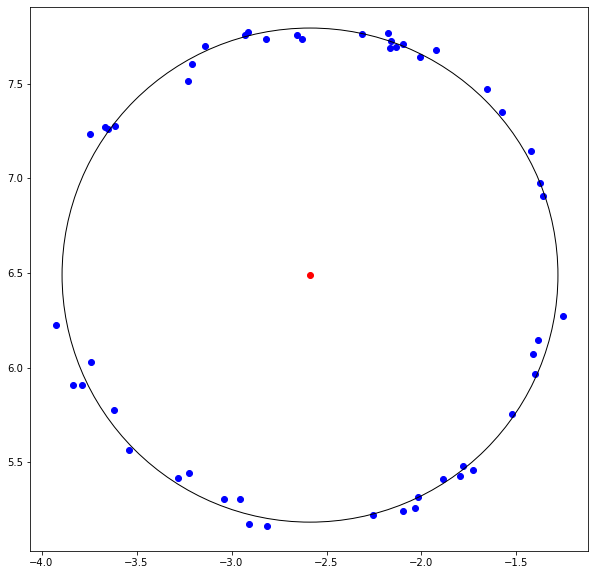

In [23]:
plt.figure(figsize=(10, 10))
plt.scatter(*U.T, color='b')
circle = plt.Circle(x_c.value, r, color='black', fill=False)
plt.gca().add_artist(circle)
plt.scatter(*x_c.value, color='red')
plt.show()

# Question 3: Learning a quadratic pseudo-metric from distance measurements 

Problem statement:

$
\mathrm{minimize} \,\,\, \frac{1}{N} \sum^N_{i=1} \left(d_i−d(x_i,y_i) \right)^2
$

where:

$
d(x,y)=\left((x−y)^T \mathbf{P} (x−y) \right)^\frac{1}{2}
$

with $\mathbf{P} \in \mathbf{S}^n_+$ (symmetric and positive semidefinite).

This problem is equivalent to the convex formulation:

$
\mathrm{minimize} \,\,\, \frac{1}{N} \sum^N_{i=1}\left( d^2_i−2d_i d(x_i,y_i)+d(x_i,y_i)^2 \right)
$

In [24]:
n = 5
N = 100
N_test = 10

In [25]:
X = np.array([[1.164954,1.696142,-1.446172,-0.360030,-0.044881,0.513478,0.375041,-0.322940,0.847649,-0.557094,-1.098195,-0.977814,-0.507700,-0.612911,1.133000,0.924159,0.394600,-0.137414,0.039885,-0.786457,-0.127443,-0.620214,-0.262681,0.499521,0.438705,0.292315,-0.759697,0.670292,-0.902031,0.846106,0.526163,0.889164,-1.010674,-1.406949,-0.165923,0.041430,-0.844414,0.336297,1.487524,0.786430,-0.702669,1.802440,-1.931134,-1.238566,1.547177,-2.526706,0.899884,-0.382918,-0.594524,1.879957,0.396727,-0.031243,0.251078,0.862500,0.968992,0.536007,1.524681,1.157783,-1.898778,-1.454749,0.418469,1.766708,-0.159448,-1.179060,-1.226502,0.658153,-0.397914,1.271743,-1.389722,-0.797533,-0.268286,1.939318,1.338814,0.420989,0.139860,-2.014986,-0.267458,0.605540,0.186747,0.434313,0.149996,1.136805,-1.378907,0.086932,-0.066596,0.642066,0.565239,-0.591204,0.393682,0.667201,-0.514013,1.289554,-0.227852,-0.904204,-1.586917,-0.047555,-0.391039,-0.956374,1.042360,-1.024905],
[0.626839,0.059060,-0.701165,-0.135576,-0.798945,0.396681,1.125162,0.317988,0.268101,-0.336706,1.122648,-1.021466,0.885299,-0.209144,0.149994,-1.814115,0.639406,0.615770,-2.482843,0.634809,0.554172,0.237149,0.976490,-1.055375,-1.247344,2.565910,-0.674721,0.420146,-2.053257,-0.184538,-0.184454,-1.299152,-0.960498,1.030812,0.300907,-1.098050,-0.311630,-0.221361,-0.836821,-1.461639,0.356429,-0.642984,0.660300,-1.889236,0.644933,-0.312981,-0.200899,0.155083,0.130246,-1.003849,-0.527115,0.778212,-0.310471,-1.034706,-0.747317,0.298451,-0.195261,0.161908,1.822525,0.466546,0.247349,-0.382104,2.704026,-0.277776,0.069600,0.491314,0.864280,-0.035344,0.229328,-0.936741,-1.082140,-0.895840,1.222299,-0.433373,-0.748089,0.491717,-0.570245,-0.624481,1.594939,-0.386207,0.542038,0.391314,-0.260172,1.955674,0.373381,0.923087,-0.610781,1.691546,-0.905427,-0.067794,1.896261,-0.530575,0.376770,0.698670,-0.920783,-0.614736,-1.382045,0.451807,1.209120,-1.056846],
[0.075080,1.797072,1.245982,-1.349338,-0.765172,0.756219,0.728642,-0.511172,-0.923489,0.415227,0.581667,0.317688,-0.248094,0.562148,0.703144,0.034973,0.874213,0.977894,1.158655,0.820410,-1.097344,-1.586847,0.977815,-0.450743,0.324667,-0.457816,-1.171687,-2.872751,0.089086,1.030714,0.198783,1.182573,0.691160,-0.759874,-0.322467,1.566724,0.397810,0.016649,-1.300982,1.554466,0.652636,0.109555,-1.102510,-0.973585,-2.148359,-0.593618,-0.233735,-0.964648,0.035014,-0.497446,0.344571,2.180484,-0.923004,-0.192673,-2.796024,0.284043,0.017260,1.557064,-1.518415,0.545437,0.704110,-0.911425,-0.198500,-1.581053,-0.396516,0.800734,-0.177618,-1.501329,0.271190,-0.002433,2.014134,-0.304158,-1.595978,0.706252,-0.628975,-1.554975,-0.187267,0.572228,0.321307,-0.112564,0.254409,1.605148,0.994768,0.161454,0.217314,-1.555108,1.231111,0.953356,-1.274473,-1.735660,-0.253230,-0.692971,1.221556,0.482598,-0.614274,0.240362,1.076292,-1.253778,0.780955,2.887723],
[0.351607,0.264069,-0.638977,-1.270450,0.861735,0.400486,-2.377454,-0.002041,-0.070499,1.557814,-0.271354,1.516108,-0.726249,-1.063923,-0.052412,-1.807862,1.752402,-1.115348,-1.026279,-0.176027,-0.731301,-0.401485,1.170021,1.270378,0.390070,-1.610827,2.032930,1.685874,2.087099,-1.527623,1.590427,1.817472,-0.758618,0.874127,-0.368411,-1.048423,1.049786,-1.192361,1.574132,-0.597535,0.215671,-0.719038,-0.102971,0.212116,-1.028845,0.332322,1.449907,0.038756,-0.624674,-1.504397,-0.723291,0.437814,-0.384776,-1.299723,0.696732,0.959664,0.246340,-0.193544,-1.051071,1.320319,0.631939,-0.996090,-0.141405,1.049022,1.388807,-0.767269,1.874381,0.365373,-0.366360,0.396086,1.944031,0.555253,-1.067730,0.227857,1.394831,-0.140609,1.208557,-0.724410,0.866841,-0.964333,-0.307241,0.825892,1.834034,-0.628688,-0.179457,0.663594,0.994300,-1.930055,0.346546,0.806349,-0.174531,-0.859806,1.098288,0.811696,-0.334672,0.125017,1.269466,0.256435,-1.179900,-0.267744],
[-0.696513,0.871673,0.577350,0.984570,-0.056225,-1.341381,-0.273782,1.606511,0.147891,-2.444299,0.414191,0.749432,-0.445040,0.351589,2.018496,1.028193,-0.320051,-0.550021,1.153487,0.562474,1.404732,-0.770692,0.159311,0.898694,-0.405138,-2.669524,0.968481,0.027925,0.365118,0.964939,0.032192,-0.584302,-0.096972,0.761127,1.147895,0.422724,-0.340796,-0.131646,1.166040,-1.210568,-0.263896,0.420628,-1.059802,0.493442,-0.141582,0.558851,1.836132,0.765458,-0.539775,-0.095449,1.268193,1.333329,1.158181,0.306596,3.206908,2.087593,-0.854485,1.651301,0.049931,-0.404494,-0.992362,1.195143,0.411268,0.302689,1.364422,0.364420,0.172400,-0.198660,1.376960,-0.508693,-1.521529,-0.324247,-0.759919,-1.016992,-1.647691,0.244944,-0.638855,1.192196,1.291844,-2.057251,-0.417112,1.470390,-1.715910,-1.438824,0.025673,-0.609500,-0.803475,0.512845,-1.195235,-0.914801,0.978788,0.529038,-0.853014,0.327883,0.080345,-0.223605,0.487268,0.421229,1.001450,-0.488540]])

Y = np.array([[0.419420,-0.611729,-0.506138,-2.122378,-0.673263,-1.350292,0.202680,0.186106,1.408075,0.179925,-0.683631,0.450343,-0.201343,-0.906374,-0.179097,0.067372,1.177170,1.173296,-0.574005,-0.081630,1.662312,1.166705,-0.960461,-0.915962,0.427947,0.213963,0.261843,0.144555,-0.972946,-0.534127,-0.310909,-1.719190,-0.345134,-0.785496,-0.275569,-0.744296,2.680118,-0.583258,-2.068566,0.385524,0.610146,-0.226541,0.263481,-0.988875,-0.130638,-1.266094,-0.768533,1.100780,-0.328912,-1.555024,0.698124,1.361879,-1.159160,-1.450383,-1.304731,1.000335,0.125589,-0.260304,-1.212525,-0.265477,-1.474263,-2.366324,1.195417,1.966075,2.955089,-1.133640,-2.032843,-0.902634,-1.327697,0.323356,0.096060,-0.875772,-1.672760,-1.548104,-0.426525,1.189467,0.750603,-1.340946,-0.876102,0.982860,0.016264,-0.934128,0.660062,0.131692,1.855048,-0.835704,-1.685751,-0.632046,1.599021,-0.245918,1.132966,-0.997240,-0.242387,0.082218,0.836056,-2.938220,1.116575,0.750101,-1.146451,-0.040269],
[-0.742745,0.100402,-0.983137,-0.850378,0.989850,0.092861,-0.421487,0.667174,-1.476422,0.029963,0.813277,-0.119641,-1.236394,-0.515380,0.168926,0.184150,-1.298539,1.611950,1.362962,-1.223518,-0.256088,-0.659430,0.130287,1.490409,0.357348,0.100046,-0.440424,0.810685,1.150638,0.688182,0.177537,0.090665,-1.015168,-0.242882,2.150379,-0.200403,-0.384886,-1.039926,1.674866,-0.784288,0.478515,1.329307,0.647336,1.036852,0.015360,1.299368,1.038744,-0.393357,1.739255,0.853390,0.623186,-0.105752,1.466680,0.475028,0.443241,-0.010695,1.233429,1.302974,0.593773,1.787029,0.268053,-0.869979,-1.700570,-2.301185,1.874092,0.462473,0.564390,1.279284,0.786037,0.615560,-0.395321,0.665887,-0.027883,0.612520,-0.508498,-0.363852,0.547452,0.181441,-1.256036,1.333580,-1.287073,0.035241,-1.229566,1.644603,2.084384,-1.018327,0.358190,0.783785,0.990909,1.646456,-0.492347,1.105070,-0.445072,0.732257,-1.958656,-1.104897,-1.372281,-0.728689,1.365443,-0.281505],
[0.572912,-1.112905,-0.437222,-0.424095,-0.577293,1.390198,1.218891,-0.429976,-0.809376,-0.711098,0.137012,0.299881,0.576187,1.181516,0.796552,-0.056014,-0.410115,2.318210,1.148564,-1.084040,-0.807258,0.385522,0.893410,2.148636,-0.513751,0.721376,-1.816264,-0.617132,0.042902,1.722587,-0.976696,1.660189,0.805136,-0.020406,-1.161508,-0.276941,-0.057147,-1.398089,-0.582561,0.384008,0.620631,-1.655171,0.814268,-0.057835,-0.673946,0.531241,0.639814,-0.222340,-1.587151,-0.779175,0.625826,-2.359716,0.255200,-0.586808,-0.400561,-0.832345,1.059862,-1.358675,0.597249,0.034741,1.765786,-0.699984,-0.585549,-0.994563,0.109977,-0.046205,1.156908,-0.346535,1.117178,-1.723877,-1.651466,0.937835,0.438835,0.193465,0.241914,-0.228302,-1.737480,0.030161,-0.269798,-0.926771,-1.553320,1.576796,-0.570628,-0.236055,-0.227784,-0.945054,-0.671933,0.240538,0.066988,1.561130,-0.336589,-1.148196,0.748184,-0.962436,-0.779537,-1.547502,2.074836,-0.648186,-0.632439,-1.227824],
[-0.143680,0.957172,1.640728,-1.029596,-1.278514,0.153271,-1.751493,-1.146584,-0.196892,0.456901,0.403788,0.643104,0.933544,0.200532,-0.464512,0.674326,-1.847284,-0.814667,-0.378804,-0.440653,-0.077400,-0.187585,0.348338,1.129853,-0.086701,0.091444,0.528719,-1.191801,0.664119,-1.273178,-0.765922,-0.653223,-1.287555,-1.440631,-0.001266,-0.975253,-1.728765,0.844010,-0.785796,0.839488,-1.770459,-0.060916,-0.709093,-0.823255,-0.525083,-0.719614,-0.661728,-0.259005,1.013978,0.844147,-1.408990,-0.777909,-0.146252,0.305144,-0.621204,-1.181208,-1.755407,0.359975,-0.294485,0.325478,-1.768180,0.859512,2.205565,0.106741,-1.372973,-1.298474,1.253641,0.081997,-0.540079,1.241964,-1.098188,1.563100,0.800308,-1.093574,-0.408954,-0.824891,-0.296406,0.381845,-0.732456,1.154125,-0.059866,-1.532254,-0.682228,-0.706986,-0.265914,-0.865398,-1.021033,-1.470454,1.993145,-0.758432,0.059077,-0.473563,-2.271209,0.876035,1.224104,-1.434385,1.485758,0.138927,1.959653,1.159358],
[-0.156844,-0.577886,0.530367,-0.349036,0.281387,0.801381,2.945547,-1.873306,-1.127700,-1.077242,1.288723,-1.775968,1.131390,-0.364330,-0.814449,2.557545,-0.899062,0.853069,-2.380476,-1.522343,-1.595641,-1.598445,0.760433,-1.434479,-0.668682,-0.002400,-0.351920,-2.082037,1.577989,-1.126164,-2.372749,2.050284,2.145294,0.780599,-1.142249,0.397122,1.280767,0.248825,-0.594914,0.471760,-0.351909,-0.470341,-0.669992,1.956099,0.711471,-0.107439,-0.170603,-1.262057,1.207766,-0.643000,-1.170419,-0.059081,-0.108548,1.017417,1.200154,-0.766562,-0.554640,1.314540,-0.935959,0.565107,1.627511,-1.296415,-0.827220,1.375143,-1.354662,0.080468,0.309434,-1.756170,-0.920435,0.568060,-1.103339,-0.756307,-0.974407,0.977825,-1.021484,0.610675,-0.369597,1.463439,0.279208,2.135796,0.582646,-0.254342,0.254562,-0.588331,-0.021790,-0.808710,2.498869,0.334877,-0.633251,-0.903983,-0.991926,0.333565,-1.080591,-0.633172,0.576336,0.128015,-0.043598,-0.153634,0.431631,-1.274743]])

X_test = np.array([[-0.186647,-0.636795,-0.242266,-1.000994,-1.094656,-0.088627,0.357200,1.236353,-0.657828,-1.081924],
[-2.001022,0.007438,0.545292,1.134810,1.258890,-0.459909,1.365078,-1.397270,-0.864847,0.965412],
[-1.028858,-0.002620,1.980639,0.758663,0.336024,-0.261001,-0.718739,-1.722115,-2.186815,0.701975],
[0.545433,0.056516,0.111102,0.291716,1.496372,0.085050,0.415523,-1.234309,-0.785680,-1.487673],
[0.224813,-1.022040,3.533658,2.245274,-0.665822,-0.009841,0.179097,0.494105,-0.905888,-0.197859]])

Y_test = np.array([[-0.294687,-0.689915,-2.285898,-0.938975,0.035156,-0.430063,0.352267,-0.385081,-0.752931,-0.014699],
[-0.222314,0.699612,-0.264101,-0.767007,-0.183959,1.502923,-0.280606,1.081048,0.391797,-0.011185],
[1.801455,0.772426,-0.945537,0.322200,0.057886,0.579556,0.961475,-1.396751,0.404377,-0.063508],
[-0.133797,0.497607,0.310190,0.612367,-0.926959,-0.457190,1.309079,-1.575387,-1.116767,-1.027934],
[-2.243783,0.391663,0.852659,0.069602,2.284313,-0.057675,-1.306810,-0.515741,-1.484789,0.988259]])

d = np.array([3.105698,9.303920,6.834464,8.535880,6.895867,2.084421,5.802307,6.078630,7.676743,7.889291,1.747867,5.421094,8.056460,5.403059,6.134915,9.260686,11.292909,6.465282,12.659127,6.716904,8.247420,7.677115,2.345364,10.289954,7.556104,9.927747,2.885653,8.667243,10.105910,8.164997,4.403754,10.905269,6.736946,7.881454,9.098149,5.616785,13.511874,8.607833,10.158668,7.828967,6.669338,10.942197,7.102851,12.512170,1.693926,5.316018,6.161766,7.008868,8.568092,13.728702,4.080557,10.282838,6.515821,11.142170,8.083361,4.659479,7.252958,11.903167,9.148000,7.844158,7.144369,12.485157,16.621630,13.365911,10.855162,4.169473,3.658437,6.554199,5.956399,6.189959,15.132870,8.958080,11.450199,6.767207,6.598192,8.818651,8.531837,5.173845,8.337579,10.310235,6.315191,1.352438,12.100806,2.871881,5.391262,5.899694,12.221590,4.330038,5.430671,8.585915,9.817138,8.901824,9.322942,3.233721,4.747448,5.238966,4.640416,5.379597,11.164867,10.616969])

d_test = np.array([7.600672,4.423181,9.997974,8.315172,12.786013,7.426758,11.055029,8.688143,6.585704,4.253190])


In [26]:
P = cvx.Variable((n,n), symmetric=True)

In [27]:
constraint = [P >> 0]  # ensures postive semidefiniteness

In [28]:
d_metric_sqrt = (X-Y).T@P@(X-Y)

In [29]:
objective = cvx.Minimize(1/N * cvx.sum(
    [d[i]**2 - 2 * d[i] * cvx.sqrt((X[:,i]-Y[:,i]).T @ P @ (X[:,i] - Y[:,i])) + ((X[:,i]-Y[:,i]).T @ P @ (X[:,i] - Y[:,i])) 
    for i in range(N)]
))

In [30]:
problem = cvx.Problem(objective=objective)
mean_squared_error_training = problem.solve()
print(f"Optimal mean squared error on the training set is {mean_squared_error_training}")

Optimal mean squared error on the training set is 0.8689067357822324


In [31]:
mean_squared_error_test = 1/N_test * cvx.sum(
    [d_test[i]**2 - 2 * d_test[i] * cvx.sqrt((X_test[:,i]-Y_test[:,i]).T @ P @ (
        X_test[:,i] - Y_test[:,i])) + ((X_test[:,i]-Y_test[:,i]).T @ P @ (X_test[:,i] - Y_test[:,i])) 
    for i in range(N_test)]
).value
print(f"Optimal mean squared error on the test set is {mean_squared_error_test}")

Optimal mean squared error on the test set is 0.8285008244493028


# Question 4: Maximum volume rectangle inside a polyhedron

Task:

Find the rectangle

$
\mathcal{R} = \{ x \in \mathbf{R}^n | l \preceq x \preceq u   \}
$

of maximum volume enclosed in a polyhedron $\mathcal{P} = \{ x | A x \preceq b \}$. The variables are $l$, $u$ $\in \mathbf{R}^n$.

Problem formulation:

The volume of an n-dimension rectangle can be expressed as:

$V = \prod_{i=1}^n \left( u_i -l_i \right)$

This product can be simplified to a sum by taking the logarithm. Maximising the volume is equivalent to maximizing the logarithm of the volume because the logarithm is monotonically increasing.

$
\begin{align}
V' & = \log \left( \prod_{i=1}^n \left( u_i - l_i \right) \right) \newline
   & = \sum_{i=1}^n \log \left( u_i - l_i\right)
\end{align}
$

According to the hint, maximizing sum(log(x)) is equivalent to maximizing geo_mean(x), but geo_mean is representable as SDP and therefore more stable in cvx. Therefore use geo_mean(x) (referring to the geometric mean) as objective.

Next, we need to define the constraints. The straight forward way would be to require the vertices to be inside the polyhedron. For each of the $2^n$ vertices $v_i$ this would mean:

$
A v_i \preceq b
$

All in all that would be $m 2^n$ constraints which is exponential ($\mathcal{O}(m2^n)$). A better formulation is needed.



For any $x \in \mathcal{R}$ we have $l \preceq x \preceq u$ (with $l \preceq u$). To make sure that $x$ is in $\mathcal{P}$ we have to fulfill:

$
A x \preceq b
$

This is equivalent to requiring for each row $i$ that the maximum of $(A x)_i$ over all $x \in \mathcal{R}$ is $\preceq b_i$:

$
\begin{align}
                \sup_{x \in \mathcal{R}} \left( A x \right)_i \preceq b 
& \Leftrightarrow & \sup_{x \in \mathcal{R}}  \left( a_i^T x \right) \preceq b \newline
& \Leftrightarrow & \sup_{x \in \mathcal{R}}  \sum_{i=1}^n \left( a_{ij} x_j \right) \preceq b \newline
& \Leftrightarrow & \sum_{i=1}^n \left( \mathcal{I(a_{ij}} \ge 0) a_{ij} u_j \right) + \sum_{i=1}^n \left( \mathcal{I(a_{ij}} \le 0) a_{ij} l_j \right)\preceq b \newline
& \Leftrightarrow & \sum_{i=1}^n \left( \mathcal{I(a_{ij}} \ge 0) a_{ij} u_j \right) + \sum_{i=1}^n \left( \mathcal{I(a_{ij}} \le 0) a_{ij} l_j \right)\preceq b \newline
& \Leftrightarrow & \sum_{i=1}^n \left( a^+_{ij} u - a^-_{ij} l \right) \preceq b
\end{align}
$

where $a_i$ is the i-th row vector in $A$, $\mathcal{I}(a_{ij} \ge 0)$ is the indicator function. The supremum with respect to $x$ is equal to selecting the values from $u$ where $a_{ij}$ are positive and the values from $u$ where $a_{ij}$ are negative. We can do this because we know that $u \preceq x \preceq l$. In the last step we used the notation:

$
a^+_{ij}= \max\{a_{ij},0\} \\
a^−_{ij}= \max\{−a_{ij},0\}
$



With that we an formulate the complete convex optimization problem

$
\begin{align}
\mathbf{minimize} \,\,\, & \mathrm{geo\_mean} \left(u -l \right) \newline
\mathbf{subject\, to} \,\,\, & \sum_{i=1}^n \left( a^+_{ij} u - a^-_{ij} l \right) \preceq b
\end{align}
$


In [45]:
A = np.array([[1.2,-1.5,0.29,-1.1,0.47,-0.53,1.9,-0.59,0.4,-0.38,0.73,-0.49,0.17,0.66,-0.3,0.43,-0.17,-0.74,1.7,-1.7,0.25,1.1,-0.49,-0.033,-0.5,0.33,-0.68,0.6,-0.47,-1.8,-0.38,1.3,-1.2,0.71,0.22,-0.75,0.65,-0.64,1.6,0.42],
[0.56,-0.69,1.1,-0.94,0.64,-1.6,-0.32,-0.032,-0.43,-1.7,-1,-0.85,-0.25,-0.18,1,1,0.13,0.14,-0.34,0.11,0.5,0.75,-1.3,-0.41,-1.3,0.23,-1.8,-0.84,0.95,0.62,0.019,0.44,0.53,-0.6,0.77,0.72,-0.93,0.22,-1.8,-0.084],
[0.34,-0.022,-0.33,0.088,1.4,0.82,-0.25,-1.7,-1.5,0.64,-0.73,-1.4,-1.3,-0.85,-1.4,-0.39,0.085,-1.7,-1.6,0.76,0.0044,-1,-1.4,-1.5,0.6,-0.72,-0.16,-1.5,0.71,0.61,-0.12,-2.2,0.48,-0.029,0.13,-0.83,1.6,-0.13,0.7,0.54],
[1.4,0.18,-0.074,-0.7,0.043,0.45,-0.31,0.81,0.66,1.2,0.23,-0.48,-0.36,1.6,0.27,-0.18,-0.42,-0.63,0.41,-0.89,-0.55,1.8,-1.3,0.52,0.37,0.014,-0.63,0.079,-1.3,-1,-0.73,-0.034,-1.7,0.95,-0.39,0.71,0.95,-0.88,-0.92,-1.8],
[-0.49,-0.53,-0.16,0.3,-0.025,-1.3,2.1,0.5,-0.27,0.91,-1.3,-0.86,-0.36,-0.56,-0.13,2.1,-0.71,0.29,1,-0.085,-1.1,0.24,0.054,0.38,-0.082,-0.88,-0.19,1.2,0.36,0.056,0.95,-0.16,0.11,0.33,-0.38,1.3,1.1,-0.34,1.7,-0.14],
[-0.067,-1.3,0.83,-0.064,-0.56,0.46,0.47,2.4,-0.32,-0.37,1,-0.41,0.74,-1.9,-0.095,1,-1.8,-0.78,1.6,0.32,-1,-1.9,2.1,-0.83,0.14,-1.4,0.46,-0.21,-1.3,-1.4,-0.39,0.99,0.17,-0.33,1.6,0.87,-0.25,-0.69,-0.88,-0.34],
[-1.9,-0.21,-2.8,0.64,-1.1,0.21,-0.21,0.84,0.56,-1,-0.74,-1.3,0.91,-0.53,-0.53,-0.00074,0.99,2.5,-1.2,-0.4,0.21,2.7,0.83,-0.97,2.4,-2.2,-0.96,-0.077,0.31,0.39,0.9,0.14,0.64,-1.7,-0.48,-0.87,1.1,0.8,-0.5,-0.27],
[-0.34,0.34,1.5,-0.36,-0.6,0.61,-1.6,0.71,-0.27,-0.38,-0.066,0.084,0.26,-0.72,-0.47,-1.4,0.69,-0.3,-0.43,-0.53,0.92,-0.33,1.3,1.5,-0.86,0.86,-0.99,-0.95,-1.4,-1.6,-1.5,0.24,0.85,-0.53,1.1,0.9,0.27,0.56,1.1,0.077],
[-0.034,-2.4,0.27,0.25,2,-0.76,-0.82,-1,-0.21,1.5,0.33,-0.64,0.86,0.15,0.028,0.31,0.82,-0.13,1.5,0.76,-1.2,0.39,1.3,-0.98,-2,1.5,-0.9,-0.091,-1,2.8,0.74,0.66,-0.39,0.51,-0.37,-2.5,-0.68,-0.28,-2,1.3],
[-0.44,-1.5,0.035,0.27,-0.75,1,-0.16,-0.11,0.25,-0.25,-0.85,-0.78,0.24,0.37,-0.91,0.19,-0.83,1.7,-0.82,0.96,0.27,-0.13,0.4,1.1,0.19,0.13,0.7,-0.75,-1.2,-0.82,-1.1,1.3,-1.4,0.13,0.44,-0.59,1,-0.18,-1.9,-1.2],
[-0.16,-2.6,0.44,-1.2,-1.1,0.85,1.6,-0.31,-0.45,-0.17,0.38,0.73,0.52,0.31,-1,1.3,0.63,-0.0079,-0.94,-0.3,-0.51,0.73,0.092,-1.8,-0.85,1.5,0.2,0.3,1.2,-0.52,0.63,-0.78,0.038,0.074,-1.6,-0.59,-0.36,-0.39,-0.0077,-0.91],
[-1.4,0.74,-0.98,0.99,1,0.56,0.74,-0.22,1.1,-0.2,0.12,0.012,0.87,-0.088,-0.61,-1.6,-1.9,0.85,-1.4,0.35,0.39,-0.22,-1.3,-0.14,-0.83,-1.5,0.18,0.86,2.2,-0.7,-0.35,-0.72,0.13,-0.26,2.8,-0.84,0.15,0.088,-0.41,-0.3],
[-0.39,0.3,-0.2,0.19,-0.86,0.68,-1.3,-1.2,-0.49,0.9,-0.28,1.5,-0.35,0.97,0.62,-0.36,0.081,-0.32,0.8,1.7,1.7,-0.42,-0.22,1,-0.18,1.9,0.39,-1.3,-1.5,-0.36,0.12,2.4,-0.12,0.46,-1.2,-0.76,-0.36,0.51,0.18,-0.55],
[1.6,1.5,-0.27,0.6,0.19,0.41,-0.34,0.69,0.88,0.41,-0.049,-1.8,-1.5,0.46,-0.47,0.65,0.87,1.8,0.084,-1,-0.045,-0.047,-1.8,-2.1,-0.77,-0.88,-1.2,1.4,-0.23,0.39,-0.38,2.3,-0.47,-0.081,-1.4,-0.22,1.7,-0.37,0.19,-0.58],
[-0.38,-0.72,-0.42,1.2,0.11,2.2,-0.58,-0.26,0.25,-0.76,-0.025,-0.67,1.4,0.82,-1.5,1,1.2,-0.22,0.12,-1.3,0.52,-1.6,0.2,-0.59,0.4,-0.089,-1.5,-0.14,0.54,-0.2,-0.75,2.8,0.44,1.5,2.1,0.94,0.77,0.75,-1.1,1.1],
[1.7,-0.71,0.49,-0.11,-0.41,1.9,-1.1,-0.01,-0.26,-1.3,-1.3,-0.72,0.51,-1.8,1.2,0.18,0.98,1.1,0.49,0.11,-0.84,1.1,-1,-1,-1.8,-0.6,-0.97,-0.3,-0.46,-2,-0.95,0.42,0.53,-1.1,-0.46,0.19,-0.8,-1.2,-0.98,1.7],
[1,-1.9,-0.4,-1.6,1,0.75,-0.17,0.82,2.9,-0.76,-0.71,-0.1,-0.93,0.92,-0.96,0.8,0.56,-0.36,0.73,0.68,-1,1.1,-0.84,0.96,0.19,0.7,0.67,1.2,-1.8,0.11,0.041,-0.15,-0.57,2.4,0.057,0.49,-0.57,1.3,0.59,-1],
[0.063,-0.29,-0.14,0.21,-1.2,-1.6,1.1,-0.18,0.95,-1.3,0.21,-0.16,-0.85,-1.9,0.51,0.32,1.4,-1.4,-0.16,0.82,-0.39,-1.3,-0.41,-1.1,0.76,1.3,-1.4,-1.1,0.36,-0.98,0.13,-1,-0.56,0.94,-1.1,-2.6,0.28,0.34,1.2,0.13],
[-1,0.019,-0.1,1.1,-1.3,-0.64,1.3,-0.73,-1.6,0.72,0.39,0.24,-1.4,-0.52,-0.2,-1.8,-1.3,0.67,0.69,-1.9,-0.74,-1.2,-0.52,-0.025,0.022,0.097,0.04,3,0.86,-0.96,-1.3,1.4,-1.9,-1.5,-0.4,-0.62,0.49,0.85,-3.8,-0.41],
[-1.4,-0.34,0.2,1.4,-0.21,-0.58,0.46,0.33,-0.027,0.69,-0.13,0.76,0.98,1,0.27,0.12,-0.19,0.2,-0.37,1.1,0.9,-1.2,0.26,0.6,-1.7,0.073,-0.51,-0.24,1.2,0.75,-0.2,0.66,-0.63,-0.34,-0.16,-0.4,1.1,0.64,1.1,-1.2],
[1.4,-1.8,-0.12,-0.26,-1.3,-0.45,-0.96,-0.17,-0.88,-0.18,-0.94,0.86,0.022,-0.065,-1.3,-0.93,0.47,0.59,-0.27,0.021,0.92,0.22,-1,-0.32,0.12,-0.49,-0.65,-0.1,-1.3,0.095,1.4,-0.82,-0.47,-0.33,-0.056,0.54,-1,-1.3,-0.47,1.1],
[-0.66,0.35,-0.16,1.3,0.81,-0.17,-1,0.3,-0.23,1.3,0.96,-0.9,0.92,-0.1,-0.53,-0.55,0.33,1.3,-1.6,-2.3,-0.28,-1.4,-0.1,-0.45,0.11,-0.83,-1,-0.47,0.1,0.12,-0.7,1.9,-0.61,0.24,1.1,-1.2,0.41,-0.67,1,0.18],
[-1.6,-1.3,-0.49,0.19,1.2,-0.42,-0.23,-1.3,0.93,0.96,0.62,0.12,-0.19,0.44,-0.28,0.5,-0.46,-0.34,-1.2,-0.42,-0.028,0.36,-0.064,-1.8,-0.82,0.8,0.9,-0.8,3.1,0.72,-0.21,-0.82,0.49,-1.2,-1.8,0.012,-0.37,0.18,0.5,-2.7],
[0.14,0.77,-0.52,-0.06,-1.2,-0.63,0.53,-1.1,-0.066,-0.37,-0.25,-0.22,-0.082,-0.62,-1.6,0.039,-0.85,0.3,-0.3,0.21,-0.17,0.63,0.7,-0.79,0.33,1.4,-1.8,-0.25,-0.95,0.15,-0.69,-0.49,-0.3,0.7,-1.1,-1.2,-0.96,-1.7,-1.2,0.23],
[-2.6,0.075,-0.16,-0.53,-0.36,-0.18,0.66,0.47,0.69,-0.86,-1.1,-0.45,0.65,0.25,0.028,0.0015,1.5,0.58,-1.5,0.43,0.3,-1.3,0.76,-1.1,0.61,-0.28,0.46,-0.11,1.4,-0.92,-0.49,2,1.2,0.77,1.1,0.84,-0.017,1.4,0.25,-0.75],
[-0.55,2.5,0.022,0.24,-1,0.22,2.1,0.96,-0.49,0.75,0.61,0.87,0.66,0.083,0.36,0.017,0.56,-0.63,1.7,0.12,-0.37,0.071,-1.2,-0.37,-0.96,-1.2,-0.23,1.2,-0.87,1.1,0.21,-1.9,1.9,0.1,0.31,0.69,1.3,0.98,0.38,0.86],
[1,1.1,-1.1,0.82,-0.76,0.54,-1.4,-3,-0.62,0.74,0.16,-0.11,1.4,-0.65,0.39,1.7,-1.9,0.52,-2,0.18,-0.82,-2.3,2.8,2,0.6,0.09,-1.5,0.45,2.4,-0.25,2,2.3,-0.52,-0.0025,-1.9,-0.76,-0.29,0.53,-2.4,-0.066],
[2,1,-0.046,1.7,1.7,-1.4,-0.082,1.3,-0.2,0.96,-0.7,0.93,-0.45,0.54,0.051,1.1,-0.83,-1,-1.4,0.089,-0.74,0.1,0.26,-0.5,-1.2,-0.044,1.1,-0.0037,-1.1,-0.84,-1.2,-1.3,-1.5,-1.1,1.6,0.24,1.2,-1.5,-0.74,-1.3],
[2.2,1.7,-0.56,0.94,-0.46,-0.24,0.2,-1.2,-0.1,0.19,-0.5,0.069,0.26,0.81,-0.83,-0.22,0.76,-0.1,0.26,0.54,1.7,-1.6,0.16,-0.019,0.3,-0.2,0.83,-0.57,0.6,0.73,0.54,-0.11,-0.52,0.32,0.57,-0.36,1.3,-1.4,0.72,-0.59],
[1,1.3,0.4,-0.0041,0.51,0.36,-1.7,0.4,1.5,-0.35,0.0038,0.24,0.12,0.76,0.84,0.75,-1.2,-0.31,0.18,-1.9,-0.58,-1.2,3.8,0.073,-1.2,-0.52,-0.56,0.12,-0.028,1.2,-1.4,-0.42,0.65,-1.3,-0.57,-0.3,2,0.32,1,-0.051],
[-0.16,-0.9,0.32,0.66,-1.2,-0.67,-0.53,0.77,-1.6,-0.62,0.4,-0.33,-1.4,-0.21,-0.86,-0.19,-0.35,-1.1,-0.24,0.88,-0.85,-0.57,0.95,-1.1,0.19,-0.45,-0.95,0.34,2.3,0.25,-2,0.0073,-0.83,-0.25,0.058,0.49,0.58,-0.34,0.18,-0.83],
[1.1,0.66,0.18,-0.3,-0.35,-0.92,0.69,0.63,1.3,1,-0.11,0.23,-0.53,0.97,0.65,-0.57,-1.8,2.5,1.8,-0.2,-0.4,0.66,0.25,0.11,-2.2,0.15,-0.34,-0.51,0.96,0.84,1,-1.9,-0.22,-0.35,0.4,0.76,-0.27,0.17,-0.15,0.83],
[0.13,0.075,-0.7,-1.1,-0.072,1.1,0.037,0.23,-0.0054,-1.3,-0.55,1.3,-1.7,-0.026,-2.2,-0.65,-1.1,2,0.58,0.63,0.72,0.16,-0.18,2.1,-0.43,-0.97,0.62,0.28,1.3,0.1,2.3,-0.073,-0.3,-3.1,-1.3,0.37,2,1.4,-2.2,0.77],
[-0.018,0.19,0.66,0.0003,0.63,-1.5,-0.56,0.31,-0.28,-0.048,0.7,1.2,0.15,-0.41,1.1,-0.88,-0.66,0.71,-0.55,0.83,2.2,0.64,-0.25,1.2,0.88,0.24,0.93,-0.91,-1,-0.27,-0.41,2.2,0.36,1.2,0.076,0.39,-0.59,-0.46,-0.54,0.99],
[0.43,-0.52,-0.12,-0.15,0.45,-0.34,1.2,0.25,-0.68,0.97,-0.84,2.3,2,1.1,-1.3,-0.77,0.65,1.5,-0.6,1,0.38,-0.76,-0.014,3,-2,0.82,-0.068,0.67,1.1,-1.3,0.27,-0.83,-2.1,-0.6,-0.99,-1.4,0.79,0.22,0.13,1.3],
[-1.4,1,-0.49,0.21,0.18,-0.87,-0.55,0.012,-1,1.8,-0.47,0.71,0.46,-0.31,1,-2,0.5,-0.19,0.36,-0.42,1.5,-0.91,-1.3,0.45,1.9,-0.1,-0.11,-0.92,0.89,0.64,0.17,0.89,-0.17,-0.17,-1.2,1.1,0.6,0.99,0.28,0.14],
[1.7,0.94,1.4,1.7,-1,-1.8,-1.5,1.5,1,-0.6,0.27,-0.27,-0.77,0.31,0.34,1.4,-0.36,-2,1.2,1.5,-1.5,-0.2,0.29,-0.47,-0.27,0.018,1.2,1.1,-2.1,-1.4,-0.83,-0.28,0.48,0.25,1.2,-1.3,-0.31,0.41,0.059,2.2],
[0.66,-1.1,0.63,-1.7,-0.38,1.2,-0.87,1,-0.52,-0.84,-0.19,-0.58,1,0.36,-0.27,-0.16,0.97,-1.1,-0.89,-1.1,-0.67,0.33,0.42,1.5,0.15,0.21,1.1,-1.9,-0.2,-1.9,1.4,0.031,-1.5,-0.4,-0.57,-0.9,-0.68,0.1,-1.3,1],
[-0.71,-0.65,0.12,1.1,1,-0.39,1.2,0.18,-0.23,-0.22,-0.72,0.044,0.17,1.8,-1.2,-0.17,-0.55,-0.5,0.16,0.17,0.71,0.49,0.59,0.6,-0.77,-0.57,1.1,-0.76,0.52,-2.5,0.69,0.97,1.5,1.3,-0.0059,-0.01,-0.36,-1.1,2.3,-1.5],
[1.6,1.7,0.76,-1.5,0.42,0.3,-0.66,0.27,-0.065,1.6,-0.77,1.2,-0.093,-1.1,0.68,-0.89,0.16,2.2,-1.6,0.58,-1.7,1.1,0.29,0.15,0.35,0.076,0.66,-1.1,-0.19,-0.75,-0.23,2.7,-0.83,-0.74,1.3,0.13,-0.42,-0.029,0.59,0.013],
[-2,0.28,-1.3,0.17,0.062,-0.099,0.66,-0.87,0.49,0.087,1.6,-0.25,1.2,0.059,-0.19,0.32,0.41,0.21,-1.1,-0.55,-0.69,-1.4,1.4,1,0.35,-0.27,0.42,0.11,-1.4,-0.88,-0.44,2.7,0.56,0.29,-0.34,2,-0.65,1.3,-0.35,-0.76],
[0.81,-0.083,-0.098,-0.37,0.45,-0.81,-0.22,-1.6,1,0.029,-1.3,0.12,1.9,-0.27,-1.4,0.71,0.0037,-0.42,-0.7,-0.76,-0.27,-0.72,0.34,0.96,0.36,0.58,-1.7,-1.3,0.42,0.26,-0.66,-2.9,-1.8,-0.92,-0.68,0.72,1.2,0.98,0.64,0.078],
[0.24,0.37,-0.32,0.57,0.55,0.74,0.74,1.2,0.28,0.37,-1.2,0.32,-0.6,0.89,1.3,-0.63,-0.84,2.2,0.15,0.98,0.65,0.31,-0.92,-0.25,-1.8,-0.28,-0.3,0.81,0.95,-2,1.1,0.93,-2.1,-0.88,-0.21,-0.39,-0.0034,-0.04,0.8,0.23],
[0.32,-0.81,-1.7,0.51,0.44,1,0.65,0.49,-1.6,-0.16,0.59,-0.31,-0.85,0.32,1.2,0.3,-0.8,-0.17,0.3,-1.6,-0.34,-0.43,-1.2,1.2,-1.2,-0.33,1,1.9,1.7,0.55,-2.4,-1.7,0.56,-0.2,0.81,1.3,-1.3,1,-0.57,0.72],
[0.52,1.9,0.38,0.47,0.28,0.8,0.039,0.28,-1.2,-1,1.8,-0.7,-1.1,-0.47,0.98,-0.73,1,-0.37,-0.78,-0.88,0.34,-1.4,-0.74,0.47,1.2,0.12,0.53,0.79,-0.93,1.6,1.9,-1.8,-0.16,2.1,0.2,-1.6,-0.54,-0.98,0.15,0.75],
[0.15,1.9,0.12,0.67,0.25,0.63,0.58,0.071,-0.09,-0.099,-0.13,-0.1,0.14,1.2,-1.4,-2.6,-1.3,0.5,0.52,0.2,1.6,-0.31,0.5,0.2,0.72,-1.6,0.38,-0.38,-0.15,0.31,1.3,0.82,0.059,1.3,0.29,0.37,-1.2,-0.94,0.84,0.036],
[-0.43,-2.5,-0.45,-1.6,0.87,-2.3,-0.36,0.27,-4.1,-0.93,-2.3,1.3,-1.5,-1.3,0.5,1.7,1.3,0.15,1.1,0.19,-0.48,0.52,0.46,0.69,0.32,-1.2,-0.72,-1.9,-0.23,-0.49,0.81,-0.97,-0.0034,-0.036,1.1,-0.22,0.56,0.6,-0.44,0.93],
[0.68,-0.4,-0.71,-1.7,-0.6,-0.24,0.61,-1.1,-0.21,0.37,0.047,-2.2,0.33,0.13,0.18,-0.95,0.079,-1,-0.14,-0.73,0.18,-0.22,1.6,0.47,1.3,-0.94,-1.1,-0.69,1.6,-0.84,-0.12,0.22,-0.68,-0.096,0.4,-0.22,0.93,-1,-0.57,0.42],
[0.84,0.11,0.47,0.0061,-0.073,-0.81,1.1,-0.26,-0.37,1.5,-1.9,0.0028,-1.1,0.85,0.52,-0.4,-0.05,0.71,0.17,1.7,0.28,0.0051,0.85,-0.39,-2.1,-0.34,-0.58,0.29,-2.8,0.22,0.16,-0.39,-0.77,-0.043,2.2,0.065,1.5,-1.5,0.35,0.23],
[0.24,0.52,-1.9,-0.43,-0.76,0.38,-0.55,-0.74,-0.28,-0.57,-1.1,-0.7,1.1,1,-1.2,-0.076,0.95,0.39,0.012,-1.3,0.56,-1.2,-1.6,-0.37,2.4,-0.93,-1.1,-1.1,0.3,0.47,-1.1,-0.8,0.32,-0.54,0.16,0.54,-0.71,0.57,0.39,-0.068],
[0.32,-0.59,-0.24,-0.83,-1.2,-0.19,-0.69,0.6,0.86,-1.1,-0.51,2.3,-0.95,1.2,-0.86,0.9,-1.6,1,-1.1,0.13,-0.59,2.1,0.95,-1.5,0.41,0.55,0.12,0.43,-2.1,-0.59,-2.4,1.1,0.79,-0.49,1.3,-0.26,0.14,-1.3,-0.55,-0.36],
[0.73,-1.1,-0.71,0.11,-1.7,-0.58,-0.45,-0.41,-0.42,1.2,-1.9,-0.64,-1.6,-0.4,0.69,-0.87,-0.33,0.86,1.4,-0.69,-1.3,-1.3,0.84,-1.7,-0.25,0.21,-1.4,-0.14,-0.4,-1.7,0.43,-1.5,0.72,-0.19,0.26,-0.91,-0.96,-0.08,-1.3,-0.17],
[0.099,-1.2,0.23,0.44,-0.41,0.14,0.74,-1.9,0.8,0.74,1.7,-0.31,-0.96,0.4,0.81,2.6,-2.5,-0.58,1,-0.47,-0.13,0.37,-1.1,-0.28,-0.13,-0.044,1.6,-0.13,-0.26,-1.1,0.29,0.22,0.21,1,0.56,-1.6,-0.28,2.2,-0.23,-0.56],
[0.056,0.087,0.098,-0.078,-1.6,-0.59,-2.4,-0.21,1.8,0.93,1.3,-0.81,-0.65,-1.5,0.59,-0.51,-0.66,0.22,0.28,-0.24,0.69,0.27,-1.3,-0.89,-0.64,-0.36,-0.2,0.054,0.59,-0.35,-1.1,-0.082,1.2,0.3,0.18,0.06,1.6,1.3,0.41,-0.4],
[-0.61,0.2,0.044,-0.26,0.33,0.73,-0.74,-0.96,0.35,0.48,-1.8,-0.77,1.7,0.63,0.38,-0.16,-1.9,0.61,0.19,-1.2,-1,0.041,0.45,1.2,1.7,-0.67,-0.89,0.39,-1.9,-1.4,-0.58,0.14,1.7,0.095,0.6,-0.13,0.53,-0.2,-0.82,0.37],
[-0.27,1.7,-0.55,0.96,0.28,-0.8,1.9,0.81,-1,-0.84,1.4,1.3,-0.074,-0.89,3.1,-0.76,0.2,-1.1,-0.11,0.54,0.23,-0.15,-1.9,1.9,-0.1,1.3,-2.3,-1.2,0.15,0.34,3,1.5,-0.41,-0.75,1.5,-2.5,0.82,-0.75,0.26,-0.035],
[-0.031,0.71,1.9,0.86,-0.26,-1.1,0.58,-2.1,1.4,1.8,-1.4,-1.9,-0.98,0.068,-0.024,-0.49,-1.6,-1.4,1.1,0.96,1.7,0.67,-0.89,-1.3,0.71,1.2,0.2,0.15,-0.56,1.4,-0.88,-0.57,-1.4,0.76,1,-0.02,-0.67,-1,0.94,0.25],
[-1.3,0.012,0.18,1.7,0.86,0.17,-0.064,0.27,0.058,0.2,-0.73,-0.1,-0.43,0.15,-0.12,2.1,0.26,1,2.6,-0.16,0.76,-1.1,-1.4,0.69,-0.56,-0.26,1.5,0.063,-0.7,0.59,0.62,-0.84,0.74,1.5,-0.66,-1.8,1.4,0.53,-0.92,0.44],
[1.4,1.6,-0.86,0.71,-0.0056,-2,0.39,1.5,0.55,1.2,-0.61,-1.3,0.99,-0.045,1.8,0.85,0.26,0.039,-1.5,-0.69,-0.29,0.98,0.27,-0.23,1.3,0.46,1.1,-0.47,-1.1,0.42,0.58,0.71,1,-0.28,1.5,-1.8,-0.77,-0.2,0.74,-0.58],
[0.54,-1.1,-1,0.5,1.3,1.1,0.03,-0.93,1.1,0.91,-1.3,-0.016,2.2,-0.45,-0.85,-0.82,0.4,1.1,0.47,-0.46,0.5,0.4,-1.5,0.86,-1.4,-0.39,-1.9,0.64,-0.6,0.013,0.71,2.1,-1.4,-0.57,-0.41,-0.034,-2.5,0.35,-0.2,0.15],
[0.032,0.41,-0.34,-1.1,-0.8,0.26,-1,1,-1.5,0.1,0.2,1.1,1.6,-0.62,0.66,-0.4,-1.2,0.055,-0.16,-0.28,2.1,1.5,-0.3,1,-0.5,0.24,0.7,1,0.064,-1,0.65,-0.69,0.87,0.44,0.063,0.23,0.44,-0.55,-1.1,-0.46],
[-0.88,0.3,-1.4,-0.015,0.53,0.39,2.7,-0.82,2.2,-0.017,2.2,-0.87,0.82,-0.43,-1.4,0.63,0.22,0.24,-0.91,0.53,0.45,-0.01,1.3,1.2,-0.28,-0.21,1.1,0.14,-0.86,-0.93,1.5,-1.1,-0.73,0.4,-0.86,0.23,-0.89,1.3,0.31,-0.5],
[1.8,0.85,-0.32,1.3,-0.24,0.16,0.22,0.6,0.25,1.2,-0.26,-2.2,0.06,0.71,0.27,-0.16,-0.83,0.7,0.45,1.6,-0.44,1.6,-0.18,-0.28,-1.6,1.6,1.4,0.16,-1.4,0.61,-0.64,0.27,1.5,0.42,1.8,0.4,-1.2,-0.046,-0.99,0.65],
[1.5,0.9,-2.1,-0.58,0.6,-1.1,-2.6,0.44,-0.21,-0.44,1.8,0.092,0.53,-0.85,1.9,1.4,-0.6,-1.4,0.31,0.43,-1.5,0.35,-0.87,-0.4,-0.49,-1.6,1.8,-1.5,-1.5,-1.9,2.1,1.4,0.63,1.3,1.6,-2.3,-0.27,-0.55,1.1,0.13],
[0.42,1.8,0.92,-0.59,-1.9,0.034,-1.9,0.95,-1.1,0.97,1.2,-1.4,-0.74,0.5,1.3,-0.66,1,0.44,0.87,1.8,-0.42,-0.11,0.65,0.71,-0.021,0.078,-1,-0.34,1.1,-0.32,-2,-0.36,-0.44,0.041,-0.37,0.59,-0.34,0.41,0.7,1.7],
[-0.45,-0.051,-0.74,0.35,0.69,-1.1,0.12,0.3,1.5,-0.12,1.3,1.6,-1.2,-0.41,-0.31,-0.099,-0.14,-1.3,0.43,-0.72,-0.52,0.49,0.24,-0.89,-0.59,-0.64,-0.65,0.33,0.037,0.52,1.1,-0.62,-0.57,-0.036,0.79,-2.6,0.72,-0.0043,0.82,-1],
[1.2,1.6,0.51,-0.11,0.67,-0.58,0.32,0.23,-0.35,-1.2,0.72,1.8,0.81,0.83,-0.11,0.67,0.41,0.038,1.1,1.2,0.65,0.047,-0.32,-0.1,1.9,2.4,0.69,-2.2,-0.91,-0.68,2.4,0.99,-0.29,-0.33,0.92,-0.53,-0.6,-0.034,0.3,1.1],
[-0.29,0.1,-0.17,-1.3,-1,-0.42,0.52,-0.75,1.4,2,-1.3,-1.8,0.72,1.9,0.0061,0.12,0.67,-1.7,0.3,0.14,-0.15,0.9,-0.51,-0.56,-0.055,0.57,0.86,-1.9,-0.01,-0.16,-0.45,0.68,-1.1,-1,0.19,-1.2,-0.85,0.18,-1.3,-0.67],
[3.8,1.3,0.062,-1.6,0.59,0.21,0.78,1.9,0.6,-0.12,-0.39,-0.17,1.2,-1,1.2,0.064,-1.3,0.13,-0.081,0.09,0.32,-1.4,0.056,-0.5,0.12,0.36,0.58,-0.067,1.1,-0.6,1,-2.2,-1.6,-0.0027,0.33,-0.83,0.42,-1.1,0.32,-0.75],
[-0.48,1.6,-0.47,-1.2,0.29,1.6,-0.16,-0.35,-1.3,-0.51,-0.51,-0.84,0.56,0.62,0.68,-0.11,-0.14,0.44,0.039,-0.41,-0.73,-0.97,-0.38,-0.27,-0.41,-0.54,0.48,-0.75,-0.97,0.01,-1.2,-0.26,0.83,-1.7,0.0063,-0.87,-2.3,0.61,2.1,0.57]]
)

In [46]:
b = np.array([4.9e+002,2.3e+002,1.4e+002,6e+002,2.1e+002,29,8.3e+002,1.4e+002,14,2e+002,68,5.9e+002,1.7e+002,7e+002,1.7e+002,7.3e+002,4.6e+002,27,4.3e+002,6e+002,6e+002,2.9e+002,6.9e+002,62,1.1e+003,2.3e+002,4.3e+002,8.6e+002,9.5e+002,4.4e+002,68,4.8e+002,55,7.5,1.8e+002,6e+002,7.5e+002,2.9e+002,3e+002,6.6e+002,8.7e+002,3.5e+002,1e+002,1.4e+002,2.2e+002,66,1.8e+002,2.9e+002,3.6e+002,1e+002,1.3e+002,3.1e+002,43,23,2.6e+002,1.2e+002,13,5.6e+002,5.9e+002,2.3e+002,14,3.8e+002,7.7e+002,6.2e+002,1.8e+002,2e+002,5.1e+002,1.2e+002,1.6e+003,2.1e+002])

In [47]:
m, n = A.shape

In [48]:
# Variables
l = cvx.Variable(n)
u = cvx.Variable(n)

In [76]:
# Objective
objective = cvx.Maximize(cvx.geo_mean(u-l))
# objective = cvx.Maximize(cvx.sum(cvx.log(u-l)))  # Objective without geo_mean

In [77]:
# Constraints
constraints = [
    cvx.maximum(A, 0) @ u - cvx.maximum(-A, 0) @ l <= b,
    l <= u,  # implicitly fulfilled
]

In [78]:
# solve problem
problem = cvx.Problem(objective, constraints)
problem.solve()

22.275569002706252

In [80]:
print(f"The geometric mean is: {problem.value}")
print(f"The volume is: {np.prod(u.value-l.value)}")

The geometric mean is: 22.275569002706252
The volume is: 8.187517800750396e+53


Note that the result differs greatly from what is expected by the autograder, which is 1.1810. However, the constraints are indeed fulfilled for all vertices (see below), so the achieved result seems not to be wrong (and has higher volume than the autograder solution):

In [91]:
(A @ l.value <= b).all() & (A @ u.value <= b).all()

True